In [269]:
import sys

sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import populations
from results_processor import ResultsProcessor


In [270]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [271]:
PERCENT_ALIVE_EARNSHAW = 0.8271604938271605 * 100
PERCENT_ALIVE_EARNSHAW_ERROR = 0.12256472421344072 * 100

PERCENT_ALIVE_EARNSHAW_UPPER = PERCENT_ALIVE_EARNSHAW + PERCENT_ALIVE_EARNSHAW_ERROR
PERCENT_ALIVE_EARNSHAW_LOWER = PERCENT_ALIVE_EARNSHAW - PERCENT_ALIVE_EARNSHAW_ERROR

PERCENT_TRANS_EARNSHAW = 0.1728395061728395 * 100
PERCENT_TRANS_EARNSHAW_ERROR = 0.03744750536124969 * 100
PERCENT_TRANS_EARNSHAW_UPPER = PERCENT_TRANS_EARNSHAW + PERCENT_TRANS_EARNSHAW_ERROR
PERCENT_TRANS_EARNSHAW_LOWER = PERCENT_TRANS_EARNSHAW - PERCENT_TRANS_EARNSHAW_ERROR

N_alive = 67
N_alive_std = 7.452910803632364
N_trans = 14
N_trans_std = 2.706010895876068

A_T = N_alive / N_trans
A_T_std = A_T * np.sqrt((PERCENT_ALIVE_EARNSHAW_ERROR/PERCENT_ALIVE_EARNSHAW)**2 + (PERCENT_TRANS_EARNSHAW_ERROR/PERCENT_TRANS_EARNSHAW)**2 )
A_T_upper = A_T + A_T_std
A_T_lower = A_T - A_T_std

In [ ]:
df = populations.startrack_v2_mt_1_all()
pop = populations.Population(df)

/home/x1/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Create sim object    
rp = ResultsProcessor()

# Set Database
db_path = '../src/ulxlc.db'
rp.set_active_db(db_path)

# Insert population
rp.set_parent_population(pop)

In [ ]:
rp.get_run_ids(True)

In [ ]:
rp.table_load_classifications()

In [ ]:
df2 = pd.DataFrame()
for d in [1.0, 0.3, 0.2, 0.1]:
    print(d)
    if d != 1.0:
        rp.sim_classifications_sampler_with_duty_cycle(d)
        rp.df_classifications['lc_classification'] = rp.df_classifications['lc_classification_new']


    df = rp.calc_all_classifications_count_stats()
    df['d']=d
    df2 = df2.append(df)

In [ ]:
rp.sim_classifications_sampler_with_duty_cycle(0.1)

In [ ]:
print(rp.df_classifications['lc_classification'].value_counts().sort_index())
print(rp.df_classifications['lc_classification_new'].value_counts().sort_index())


In [ ]:
df3 = df2.copy()
Z = []
dincl_cutoff = []
bh_ratio = []
for i in df3.index:
    Z.append(i[0])
    dincl_cutoff.append(i[1])
    bh_ratio.append(i[2])
    
df3['Z']=Z
df3['dincl_cutoff']=dincl_cutoff
df3['bh_ratio']=bh_ratio


In [ ]:
df3 = df3.set_index(['Z', 'dincl_cutoff', 'bh_ratio', 'd'])

In [166]:
df3.loc[:,46,:]

N_dead                                     N_trans  \
                       min        mean    max        std count     min   
Z      bh_ratio d                                                        
0.0002 0.00     1.0  111.0  138.242591  166.0   9.790632   911   181.0   
       0.25     1.0   82.0  110.508233  145.0   9.539028   911   165.0   
       0.50     1.0   52.0   83.397273  108.0   8.082344  1100   145.0   
       0.75     1.0   35.0   55.680571   79.0   6.666634   911   129.0   
       1.00     1.0   13.0   27.954995   46.0   5.280605   911   112.0   
0.002  0.00     1.0   91.0  126.057000  151.0   9.275332  1000   141.0   
       0.25     1.0   77.0  103.354000  131.0   8.986737  1000   134.0   
       0.50     1.0   54.0   80.020000  106.0   8.076385  1100   123.0   
       0.75     1.0   35.0   56.511000   81.0   6.898222  1000   108.0   
       1.00     1.0   18.0   33.237000   52.0   5.585520  1000   100.0   
0.02   0.00     1.0  128.0  160.315556  190.0  10.386008   900   173.0   
       0.25     1.0   98.0  129.680000  159.0   9.172057   900   163.0   
       0.50     1.0   17.0   99.491014  133.0   8.600211  1558    55.0   
       0.75     1.0   50.0   69.758621   92.0   7.144907   899   122.0   
       1.00     1.0   22.0   39.236930   62.0   5.881583   899   112.0   
0.0002 0.00     0.3  134.0  162.787047  197.0  10.352718   911   167.0   
       0.25     0.3  103.0  129.496158  164.0   9.883038   911   150.0   
       0.50     0.3   66.0   96.799091  121.0   8.375329  1100   135.0   
       0.75     0.3   43.0   63.466520   84.0   6.806003   911   126.0   
       1.00     0.3   14.0   29.854007   47.0   5.327060   911   108.0   
0.002  0.00     0.3   94.0  131.075000  160.0   9.433577  1000   137.0   
       0.25     0.3   79.0  111.349000  141.0   9.255423  1000   126.0   
       0.50     0.3   66.0   90.946364  114.0   8.462831  1100   117.0   
       0.75     0.3   48.0   70.690000  105.0   7.706964  1000   102.0   
       1.00     0.3   29.0   50.498000   71.0   6.758674  1000    96.0   
0.02   0.00     0.3  139.0  170.824444  202.0  10.387822   900   165.0   
       0.25     0.3  110.0  148.353333  185.0   9.906327   900   146.0   
       0.50     0.3   34.0  126.462131  162.0   9.783569  1558    42.0   
       0.75     0.3   79.0  104.988877  134.0   8.923074   899   105.0   
       1.00     0.3   59.0   82.731924  113.0   8.263236   899    82.0   
0.0002 0.00     0.2  132.0  166.373216  199.0  10.391517   911   165.0   
       0.25     0.2  101.0  132.141603  164.0   9.887206   911   149.0   
       0.50     0.2   72.0   98.603636  123.0   8.429291  1100   133.0   
       0.75     0.2   43.0   64.557629   83.0   6.857476   911   126.0   
       1.00     0.2   14.0   30.164654   47.0   5.462087   911   110.0   
0.002  0.00     0.2   94.0  131.729000  160.0   9.402445  1000   137.0   
       0.25     0.2   80.0  112.486000  140.0   9.303890  1000   126.0   
       0.50     0.2   64.0   92.600909  116.0   8.506691  1100   117.0   
       0.75     0.2   52.0   72.772000  106.0   7.727077  1000   100.0   
       1.00     0.2   32.0   53.026000   74.0   6.750325  1000    94.0   
0.02   0.00     0.2  137.0  172.408889  203.0  10.493153   900   161.0   
       0.25     0.2  117.0  151.242222  190.0   9.749658   900   146.0   
       0.50     0.2   35.0  130.253530  165.0   9.738813  1558    42.0   
       0.75     0.2   81.0  109.985539  134.0   9.327666   899   103.0   
       1.00     0.2   66.0   88.698554  115.0   8.613277   899    80.0   
0.0002 0.00     0.1  137.0  169.947311  201.0  10.456370   911   162.0   
       0.25     0.1  102.0  134.958288  166.0   9.905621   911   149.0   
       0.50     0.1   75.0  100.600909  124.0   8.397203  1100   132.0   
       0.75     0.1   45.0   65.661910   86.0   6.824960   911   125.0   
       1.00     0.1   13.0   30.396268   47.0   5.469993   911   108.0   
0.002  0.00     0.1   94.0  132.456000  159.0   9.466662  1000   137.0   
       0.25     0.1   80

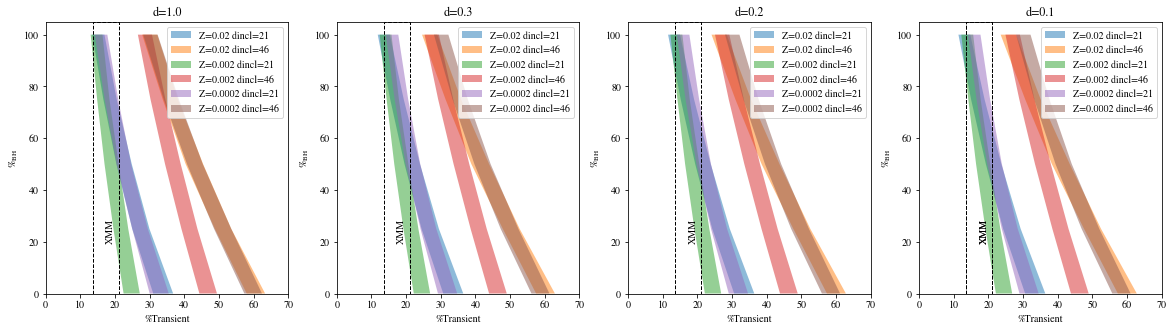

In [168]:
#plt.figure(figsize=(7,7))

fig, ax = plt.subplots(nrows=1,ncols=len(DCS), figsize=(20,5))
for a in ax:
    a.set_xlabel('%Transient')
    a.set_xlim(0,70)
    a.set_ylabel(r'$\%_{\mathrm{BH}}$')
    a.set_ylim(0,105)
    a.axvspan(PERCENT_TRANS_EARNSHAW_LOWER, PERCENT_TRANS_EARNSHAW_UPPER, fill='', linestyle='--')
    a.text(x=PERCENT_TRANS_EARNSHAW, y=20, s='XMM', rotation=90)
    
    
#plt.xlabel('%Transient')
#plt.xlim(0,70)

#plt.ylabel(r'$\%_{\mathrm{BH}}$')
plt.ylim(0,105)

plt.axvspan(PERCENT_TRANS_EARNSHAW_LOWER, PERCENT_TRANS_EARNSHAW_UPPER, fill='', linestyle='--')
plt.text(x=PERCENT_TRANS_EARNSHAW, y=20, s='XMM', rotation=90)

BHS = [0,0.25,0.5,0.75,1.0]
DCS = [1.0,0.3,0.2,0.1]
BHS_100 = [100*b for b in BHS]



for Z in ['0.02', '0.002', '0.0002']:
    for dincl in [21, 46]:
        for i, d in enumerate(DCS):
            M = []
            STD = []
            xlow = []
            xhigh = []
            for bh in BHS:
                sub = df3['frac_trans_visible'].loc[Z,dincl,bh,d]
                m = sub['mean']
                std = sub['std']

                xlow.append(m-std)
                xhigh.append(m+std)
                STD.append(std)

                #print(Z, dincl, bh, m, std)
                #plt.errorbar(x=m, y=100*bh, xerr=std)
            ax[i].set_title(f'd={d}')
            ax[i].fill_betweenx(y=BHS_100, x1=xlow, x2=xhigh, alpha=0.5, label=f'Z={Z} dincl={dincl}')

for a in ax:
    a.legend()
#plt.savefig('regions.png', dpi=1000)
plt.show()

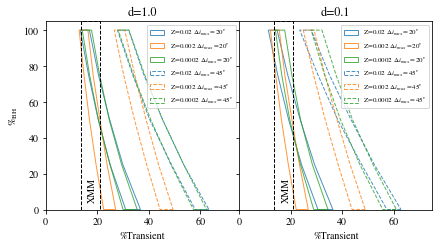

<Figure size 432x288 with 0 Axes>

In [212]:
#plt.figure(figsize=(7,7))

ncols = 2
w = 6.93
h = w/ncols

fig, ax = plt.subplots(nrows=1,ncols=ncols, figsize=(10,5), sharey=True)
fig.set_size_inches([w,h])

ax[0].set_ylabel(r'$\%_{\mathrm{BH}}$')
for a in ax:
    a.set_xlabel('%Transient')
    a.set_xlim(0,75)
    
    a.set_ylim(0,105)
    a.axvspan(PERCENT_TRANS_EARNSHAW_LOWER, PERCENT_TRANS_EARNSHAW_UPPER, fill='', linestyle='--')
    a.text(x=PERCENT_TRANS_EARNSHAW-1, y=5, s='XMM', rotation=90)
plt.subplots_adjust(wspace=0)
    
#plt.xlabel('%Transient')
#plt.xlim(0,70)

#plt.ylabel(r'$\%_{\mathrm{BH}}$')
plt.ylim(0,105)



BHS = [0,0.25,0.5,0.75,1.0]
DCS = [1.0, 0.1]
BHS_100 = [100*b for b in BHS]


colors = ['C0','C1','C2','C0','C1','C2']
linestyles = ['-', '-', '-', '--','--','--']

j=0
for dincl in [21, 46]:
    for Z in ['0.02', '0.002', '0.0002']:
        for i, d in enumerate(DCS):
            M = []
            STD = []
            xlow = []
            xhigh = []
            for bh in BHS:
                sub = df3['frac_trans_visible'].loc[Z,dincl,bh,d]
                m = sub['mean']
                std = sub['std']

                xlow.append(m-std)
                xhigh.append(m+std)
                STD.append(std)

                #print(Z, dincl, bh, m, std)
                #plt.errorbar(x=m, y=100*bh, xerr=std)
            ax[i].set_title(f'd={d}')
            ax[i].fill_betweenx(y=BHS_100, x1=xlow, x2=xhigh, alpha=0.8, label=fr'Z={Z} $\Delta i_{{max}}=${dincl-1}$^{{\circ}}$', facecolor='None', ec=colors[j], linestyle=linestyles[j])
        j+=1

for a in ax:
    a.legend(prop={'size': 7})
    

plt.savefig('../reports/figures/BH_ratio_constraint.pdf')
plt.savefig('../reports/figures/BH_ratio_constraint.png', dpi=1000)
plt.show()
plt.tight_layout()

In [226]:
rp.table_load_erass_evolution()
Z='0.02'
duty_cycle=0.1

cycles = ['1', '2', '3', '4', '5', '6', '7', '8']
dincls = rp.df_erass_mc_info['dincl_cutoff'].unique()
bh_percents = np.sort(rp.df_erass_mc_info['bh_ratio'].unique())

erass_system_period_cutoff = 999999

for i, dincl in enumerate(dincls):
    for j, bh in enumerate(bh_percents):
        key = (500, bh, dincl, Z, erass_system_period_cutoff)
        df = rp.get_erass_evolution_from_key(key)

        df = df[df['duty_cycle']==duty_cycle]

        sub_wind = df[df['period'] == 'P_wind']
        sub_sup = df[df['period'] == 'P_sup']

KeyError: (500, 0.0, 21, '0.02', 999999)

In [269]:
duty_cycles = [1.0,0.3,0.2,0.1]

df_res_wind = pd.DataFrame()
df_res_sup = pd.DataFrame()



for d in duty_cycles:
    print(f'duty_cycle:{d}')
    for k in rp.dict_MC_run_ids.keys():
        print(k)
        size = k[0]
        bh = k[1]
        dincl_max = k[2]
        Z = k[3]
        
        df = rp.get_erass_evolution_from_key(k)
        df = df[df['duty_cycle']==duty_cycle]

        df['percent_obs'] = (df['N_total_systems']/500) * 100
        df['percent_trans_to_obs'] = df['N_transients_cum'] / df['N_total_systems'] * 100

        sub_wind = df[df['period'] == 'P_wind']
        sub_sup = df[df['period'] == 'P_sup']

        agg_wind = sub_wind.groupby(['erass_cycle']).agg(['mean', 'std'])
        agg_sup = sub_sup.groupby(['erass_cycle']).agg(['mean', 'std'])

(500, 0.0, 21, '0.0002')
(500, 0.0, 21, '0.002')
(500, 0.0, 21, '0.02')
(500, 0.0, 46, '0.0002')
(500, 0.0, 46, '0.002')
(500, 0.0, 46, '0.02')
(500, 0.25, 21, '0.0002')


KeyboardInterrupt: 

In [271]:
agg_sup['N_transients']

,mean,std
erass_cycle,,
1,0.000000,0.000000
2,86.388889,8.626723
3,22.653333,4.766849
4,10.120000,3.131710
5,5.955556,2.484260
6,3.600000,1.901349
7,2.661111,1.586104
8,1.904444,1.395919


,mean,std
erass_cycle,,
1,0.000000,0.000000
2,11.336945,2.129160
3,15.752779,2.372344
4,18.362550,2.511681
5,20.253120,2.576310
6,21.697373,2.636430
7,22.788774,2.681095
8,23.665343,2.689641


In [ ]:
Things to measure:
    % Transient / observed
    % Transient / observed_std
    
    % underlying population observed
    % underlying population observed_std
    


In [244]:
N_transient_wind

,mean,std
erass_cycle,,
1,0.000000,0.000000
2,25.856667,4.962654
3,10.967778,3.330525
4,6.744444,2.635267
5,5.035556,2.270099
6,3.908889,2.010686
7,3.016667,1.737101
8,2.423333,1.550668


In [79]:
rp.table_load_erass_mc_info()
rp.table_load_classifications()
rp.table_load_erass_evolution()

In [48]:
res

run_id                                 
00002ed0-1c02-4b71-8fb9-5d94a962ecec  2    189
                                      1     60
                                      0     55
                                      4    196
0001b901-4bab-4c74-a9a3-395d1792c4bf  2    161
                                          ... 
fffd1d48-8875-4011-b00a-32093b228e7c  4    173
fffe42f8-d895-44c5-b29e-79f8a889b31f  1    204
                                      0    136
                                      2     97
                                      4     63
Name: lc_classification, Length: 120044, dtype: int64

In [ ]:
res

In [84]:
cycle_8 = rp.df_erass_evolution[rp.df_erass_evolution['erass_cycle']==8]
cycle_8 = cycle_8[cycle_8['duty_cycle']==1.0]
cycle_8_wind = cycle_8[cycle_8['period']=='P_wind']
cycle_8_sup = cycle_8[cycle_8['period']=='P_sup']


In [85]:
cycle_8

,erass_cycle,N_new_systems,N_old_system_become_transient,N_observed_ulxs,N_delta_obs_ulx,N_transients,N_transients_cum,N_total_systems,N_persistent_ulx_systems,period,duty_cycle,run_id
7,8,1,0,410,1,1,8,415,407,P_wind,1.0,00002ed0-1c02-4b71-8fb9-5d94a962ecec
15,8,0,0,422,0,0,47,438,391,P_sup,1.0,00002ed0-1c02-4b71-8fb9-5d94a962ecec
71,8,1,0,384,1,1,9,388,379,P_wind,1.0,0001b901-4bab-4c74-a9a3-395d1792c4bf
79,8,1,1,390,0,2,48,411,363,P_sup,1.0,0001b901-4bab-4c74-a9a3-395d1792c4bf
135,8,0,1,386,-1,1,29,399,370,P_wind,1.0,0002b574-5dc8-44ba-8ba7-8ee2257ff6cf
...,...,...,...,...,...,...,...,...,...,...,...,...
1920463,8,2,0,269,2,2,58,299,241,P_sup,1.0,fffccd2d-ed7a-43cd-843b-1909a2869fac
1920519,8,1,0,350,1,1,34,371,337,P_wind,1.0,fffd1d48-8875-4011-b00a-32093b228e7c
1920527,8,0,2,354,-2,2,111,415,304,P_sup,1.0,fffd1d48-8875-4011-b00a-32093b228e7c
1920583,8,0,0,220,0,0,25,232,207,P_wind,1.0,fffe42f8-d895-44c5-b29e-79f8a889b31f


In [86]:
trans_wind = cycle_8_wind.groupby(['run_id'])['N_transients_cum'].sum()
trans_sup = cycle_8_sup.groupby(['run_id'])['N_transients_cum'].sum()


In [87]:
trans_wind

run_id
00002ed0-1c02-4b71-8fb9-5d94a962ecec     8
0001b901-4bab-4c74-a9a3-395d1792c4bf     9
0002b574-5dc8-44ba-8ba7-8ee2257ff6cf    29
0007b8bb-d738-460c-9f6b-383d5df796cd    17
00098911-eaea-424d-8278-23c7f0e4ad2c    36
                                        ..
fff890c2-8019-4ad1-ab14-e98ee0af4f96    62
fffab900-ac91-43b8-8a53-1d97240f4ac9    42
fffccd2d-ed7a-43cd-843b-1909a2869fac    18
fffd1d48-8875-4011-b00a-32093b228e7c    34
fffe42f8-d895-44c5-b29e-79f8a889b31f    25
Name: N_transients_cum, Length: 30010, dtype: int64

In [81]:
transient = rp.df_classifications[rp.df_classifications['lc_classification']==1]
trans_class = transient.groupby(['run_id'])['lc_classification'].sum()

In [82]:
trans_class

run_id
00002ed0-1c02-4b71-8fb9-5d94a962ecec     60
0001b901-4bab-4c74-a9a3-395d1792c4bf     69
0002b574-5dc8-44ba-8ba7-8ee2257ff6cf    140
0007b8bb-d738-460c-9f6b-383d5df796cd    124
00098911-eaea-424d-8278-23c7f0e4ad2c    148
                                       ... 
fff890c2-8019-4ad1-ab14-e98ee0af4f96    223
fffab900-ac91-43b8-8a53-1d97240f4ac9    148
fffccd2d-ed7a-43cd-843b-1909a2869fac     87
fffd1d48-8875-4011-b00a-32093b228e7c    161
fffe42f8-d895-44c5-b29e-79f8a889b31f    204
Name: lc_classification, Length: 30011, dtype: int64

In [83]:
trans

NameError: name 'trans' is not defined

In [123]:
N_transients = pd.concat([trans_class, trans_wind, trans_sup], axis=1)

In [124]:
N_transients.columns = ['N', 'N_wind', 'N_sup']

In [125]:
N_transients['%_wind'] = N_transients['N_wind'] / N_transients['N']
N_transients['%_sup'] = N_transients['N_sup'] / N_transients['N']


In [126]:
N_transients

,N,N_wind,N_sup,%_wind,%_sup
00002ed0-1c02-4b71-8fb9-5d94a962ecec,60,8.0,47.0,0.133333,0.783333
0001b901-4bab-4c74-a9a3-395d1792c4bf,69,9.0,48.0,0.130435,0.695652
0002b574-5dc8-44ba-8ba7-8ee2257ff6cf,140,29.0,81.0,0.207143,0.578571
0007b8bb-d738-460c-9f6b-383d5df796cd,124,17.0,76.0,0.137097,0.612903
00098911-eaea-424d-8278-23c7f0e4ad2c,148,36.0,100.0,0.243243,0.675676
...,...,...,...,...,...
fff890c2-8019-4ad1-ab14-e98ee0af4f96,223,62.0,155.0,0.278027,0.695067
fffab900-ac91-43b8-8a53-1d97240f4ac9,148,42.0,93.0,0.283784,0.628378
fffccd2d-ed7a-43cd-843b-1909a2869fac,87,18.0,58.0,0.206897,0.666667
fffd1d48-8875-4011-b00a-32093b228e7c,161,34.0,111.0,0.211180,0.689441


Text(0.5, 1.0, 'P_wind')

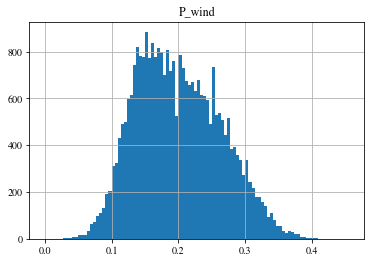

In [127]:
N_transients['%_wind'].hist(bins=100)
plt.title('P_wind')

Text(0.5, 1.0, 'P_sup')

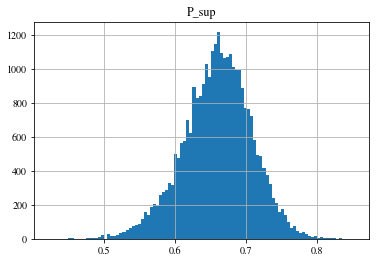

In [128]:
N_transients['%_sup'].hist(bins=100)
plt.title('P_sup')

In [129]:
info = rp.df_erass_mc_info.set_index(['run_id'])
info

,size,bh_ratio,dincl_cutoff,Z,erass_system_period_cutoff
run_id,,,,,
7304f73c-124c-482d-927f-7935ab4d65df,500,0.50,21,0.02,999999
e62a25b6-3718-49f5-8a79-848164825360,500,0.50,21,0.02,999999
e856ab8c-2cc6-4ecf-a494-ad3d2a466e54,500,0.50,21,0.02,999999
767de90e-7e6a-46ad-8d75-cc46e08f6142,500,0.50,21,0.02,999999
b3c11839-e368-4d24-ab79-1d1a18a0e17c,500,0.50,21,0.02,999999
...,...,...,...,...,...
e054f24d-50a9-4d17-86fc-e11338a33bcb,500,1.00,21,0.02,999999
0f9f0a68-11c5-43fa-84e3-6b63214b31a0,500,0.00,46,0.02,999999
9798ea26-876a-4a21-b379-56e5bde83ce2,500,0.25,46,0.02,999999


In [130]:
N_transients = pd.concat([N_transients, info], axis=1)
N_transients

,N,N_wind,N_sup,%_wind,%_sup,size,bh_ratio,dincl_cutoff,Z,erass_system_period_cutoff
00002ed0-1c02-4b71-8fb9-5d94a962ecec,60,8.0,47.0,0.133333,0.783333,500.0,1.00,21.0,0.002,999999.0
0001b901-4bab-4c74-a9a3-395d1792c4bf,69,9.0,48.0,0.130435,0.695652,500.0,0.75,21.0,0.002,999999.0
0002b574-5dc8-44ba-8ba7-8ee2257ff6cf,140,29.0,81.0,0.207143,0.578571,500.0,1.00,46.0,0.02,999999.0
0007b8bb-d738-460c-9f6b-383d5df796cd,124,17.0,76.0,0.137097,0.612903,500.0,1.00,46.0,0.0002,999999.0
00098911-eaea-424d-8278-23c7f0e4ad2c,148,36.0,100.0,0.243243,0.675676,500.0,0.75,46.0,0.02,999999.0
...,...,...,...,...,...,...,...,...,...,...
fff890c2-8019-4ad1-ab14-e98ee0af4f96,223,62.0,155.0,0.278027,0.695067,500.0,0.00,46.0,0.02,999999.0
fffab900-ac91-43b8-8a53-1d97240f4ac9,148,42.0,93.0,0.283784,0.628378,500.0,0.75,46.0,0.02,999999.0
fffccd2d-ed7a-43cd-843b-1909a2869fac,87,18.0,58.0,0.206897,0.666667,500.0,0.00,21.0,0.002,999999.0
fffd1d48-8875-4011-b00a-32093b228e7c,161,34.0,111.0,0.211180,0.689441,500.0,0.75,46.0,0.002,999999.0


In [159]:
gb = N_transients.groupby(['Z', 'dincl_cutoff', 'bh_ratio'])
gb.agg(['mean', 'std'])[['%_wind', '%_sup']]

%_wind               %_sup          
                                  mean       std      mean       std
Z      dincl_cutoff bh_ratio                                        
0.0002 21.0         0.00      0.141681  0.034318  0.686553  0.047454
                    0.25      0.143536  0.036459  0.673392  0.049166
                    0.50      0.140651  0.038385  0.662180  0.052730
                    0.75      0.142248  0.040070  0.649885  0.054345
                    1.00      0.141089  0.041890  0.629810  0.056463
       46.0         0.00      0.143319  0.023096  0.691244  0.031670
                    0.25      0.145688  0.025610  0.680182  0.033635
                    0.50      0.148007  0.026165  0.668929  0.035352
                    0.75      0.153086  0.029520  0.656141  0.038715
                    1.00      0.157056  0.031037  0.641579  0.039249
0.002  21.0         0.00      0.246419  0.048192  0.670193  0.051678
                    0.25      0.224386  0.045964  0.662742  0.054058
                    0.50      0.205676  0.046136  0.652235  0.055807
                    0.75      0.177152  0.047049  0.640368  0.059898
                    1.00      0.152706  0.046792  0.628092  0.061330
       46.0         0.00      0.250203  0.031902  0.674824  0.035311
                    0.25      0.233499  0.033493  0.669542  0.035351
                    0.50      0.214705  0.032902  0.662625  0.038702
                    0.75      0.191227  0.032829  0.651737  0.038143
                    1.00      0.167079  0.032348  0.639751  0.042512
0.02   21.0         0.00      0.293889  0.046654  0.668304  0.046896
                    0.25      0.271625  0.047774  0.663507  0.050681
                    0.50      0.244905  0.047430  0.657905  0.052774
                    0.75      0.207764  0.049170  0.649423  0.057519
                    1.00      0.169047  0.045580  0.644087  0.060804
       46.0         0.00      0.300099  0.032385  0.675434  0.033194
                    0.25      0.278285  0.032771  0.670852  0.033064
                    0.50      0.254773  0.032807  0.665768  0.035565
                    0.75      0.221950  0.033103  0.660808  0.037831
                    1.00      0.180663  0.034467  0.651950  0.039224

In [163]:
gb = N_transients.groupby(['Z', 'dincl_cutoff'])
res = gb.agg(['mean', 'std'])[['%_wind', '%_sup']]*100
res

%_wind                %_sup          
                          mean       std       mean       std
Z      dincl_cutoff                                          
0.0002 21.0          14.179412  3.831616  66.043579  5.553360
       46.0          14.937441  2.762039  66.766733  3.969451
0.002  21.0          20.135430  5.723386  65.075567  5.857908
       46.0          21.140840  4.389922  65.975331  4.009076
0.02   21.0          23.842153  6.313461  65.681089  5.442430
       46.0          24.814415  5.147882  66.506848  3.660713

In [167]:
 with open('../reports/table_percentage_trans_identified.txt', 'w+') as f:
    f.write(res.to_latex(float_format="{:0.2f}".format))

In [173]:
split_Z=True
margins=True
#Classifications pivot
rp.table_classifications_map_systems()
if split_Z==True:
    piv = pd.pivot_table(rp.df_classifications,
                         columns=['is_bh'],
                         index=['Z', 'lc_classification'],
                         aggfunc='count',
                         margins=margins,
                         margins_name='total').run_id

if split_Z==False:
    piv = pd.pivot_table(rp.df_classifications,
                   columns=['is_bh'],
                   index=['lc_classification'],
                   aggfunc='count',
                   margins=margins,
                   margins_name='total').run_id

if margins==True:
    piv['%_NS'] = piv[0]/piv['total']*100
    piv['%_BH'] = piv[1]/piv['total']*100

df_pivot_lc_classifcations = piv

In [170]:
df_pivot_lc_classifcations

is_bh                           0        1     total       %_NS       %_BH
Z      lc_classification                                                  
0.0002 0                   799633   196853    996486  80.245282  19.754718
       1                   748292   506011   1254303  59.657993  40.342007
       2                   577899   836104   1414003  40.869715  59.130285
0.002  0                   779158   232761   1011919  76.998060  23.001940
       1                   657090   498731   1155821  56.850498  43.149502
       2                   442684   759366   1202050  36.827420  63.172580
0.02   0                   979757   284503   1264260  77.496480  22.503520
       1                   776451   523840   1300291  59.713633  40.286367
       2                   483781   722733   1206514  40.097421  59.902579
total                     6244745  4560902  10805647  57.791496  42.208504

In [202]:
df_class = rp.df_classifications.set_index('run_id')
df_class

,system_row_id,system_theta,system_dincl,system_inclination,lc_min_flux,lc_max_flux,lc_ulx_lim,lc_classification,is_bh,P_wind_days,a*,Z,lmxrb
run_id,,,,,,,,,,,,,
7304f73c-124c-482d-927f-7935ab4d65df,1441023,11.026186,17,0,2.950423,30.457538,11.685317,2,1,2.510783e+04,0.998,0.02,0
7304f73c-124c-482d-927f-7935ab4d65df,1584757,5.668762,1,22,1.632233,1.938279,13.274466,2,1,7.436874e+05,0.998,0.02,0
7304f73c-124c-482d-927f-7935ab4d65df,1326493,19.303523,17,60,0.003964,0.197982,9.357460,1,1,1.216320e+03,0.998,0.02,0
7304f73c-124c-482d-927f-7935ab4d65df,756284,15.608497,14,3,4.988900,17.768296,8.553030,2,1,3.202806e+03,0.998,0.02,1
7304f73c-124c-482d-927f-7935ab4d65df,319691,4.584886,1,18,2.415543,2.933040,21.924181,2,1,3.481016e+06,0.998,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7d74588b-bb3c-4a28-8b2b-cd4cdbc24edf,956040,4.584886,29,63,0.000003,0.708822,30.641857,1,1,8.574399e+13,0.998,0.02,0
7d74588b-bb3c-4a28-8b2b-cd4cdbc24edf,1335658,4.584886,43,85,0.000003,0.384870,28.863788,1,1,3.449330e+11,0.998,0.02,0
7d74588b-bb3c-4a28-8b2b-cd4cdbc24edf,993312,13.671452,22,88,0.000001,0.024248,8.134361,0,1,5.920968e+03,0.998,0.02,0


In [203]:
def lc_class_counts(df_classifications):
    vc = df_classifications.value_counts()
    vc['4']=500-vc.sum()
    return vc

In [204]:
gb = rp.df_classifications.groupby(['run_id'])['lc_classification']
res = gb.apply(lc_class_counts)

KeyboardInterrupt: 

In [193]:
res

run_id                                 
00002ed0-1c02-4b71-8fb9-5d94a962ecec  2    189
                                      1     60
                                      0     55
                                      4    196
0001b901-4bab-4c74-a9a3-395d1792c4bf  2    161
                                          ... 
fffd1d48-8875-4011-b00a-32093b228e7c  4    173
fffe42f8-d895-44c5-b29e-79f8a889b31f  1    204
                                      0    136
                                      2     97
                                      4     63
Name: lc_classification, Length: 120044, dtype: int64

In [209]:
k=(500, 0.0, 21, '0.0002')
class_df = pd.DataFrame()
for k in rp.dict_MC_run_ids.keys():
    print(k)
    res2=rp.calc_classification_counts(k)
    class_df = class_df.append(res2)

(500, 0.0, 21, '0.0002')
(500, 0.0, 21, '0.002')
(500, 0.0, 21, '0.02')
(500, 0.0, 46, '0.0002')
(500, 0.0, 46, '0.002')
(500, 0.0, 46, '0.02')
(500, 0.25, 21, '0.0002')
(500, 0.25, 21, '0.002')
(500, 0.25, 21, '0.02')
(500, 0.25, 46, '0.0002')
(500, 0.25, 46, '0.002')
(500, 0.25, 46, '0.02')
(500, 0.5, 21, '0.0002')
(500, 0.5, 21, '0.002')
(500, 0.5, 21, '0.02')
(500, 0.5, 46, '0.0002')
(500, 0.5, 46, '0.002')
(500, 0.5, 46, '0.02')
(500, 0.75, 21, '0.0002')
(500, 0.75, 21, '0.002')
(500, 0.75, 21, '0.02')
(500, 0.75, 46, '0.0002')
(500, 0.75, 46, '0.002')
(500, 0.75, 46, '0.02')
(500, 1.0, 21, '0.0002')
(500, 1.0, 21, '0.002')
(500, 1.0, 21, '0.02')
(500, 1.0, 46, '0.0002')
(500, 1.0, 46, '0.002')
(500, 1.0, 46, '0.02')


In [210]:
class_df

,N_dead,N_trans,N_alive,N_persistent,N_alive_persistent,frac_alive_visible,frac_trans_visible
6f82b6e7-0b65-48f3-987d-efed3d505435,236.0,93.0,117.0,54,171.0,64.772727,35.227273
ee84775f-625a-4a5d-944d-bfb8d94aaa47,231.0,91.0,137.0,41,178.0,66.171004,33.828996
72c7198a-f42e-41c1-bdbd-1ec8cd4a935f,230.0,84.0,143.0,43,186.0,68.888889,31.111111
8c8838fb-1492-4698-9edb-7f5565b4b5dd,229.0,90.0,132.0,49,181.0,66.789668,33.210332
521210d5-4bf6-40d0-846a-0a118270d030,228.0,77.0,140.0,55,195.0,71.691176,28.308824
...,...,...,...,...,...,...,...
b889d39e-e66d-45b0-83e1-5cd045008d3e,25.0,155.0,121.0,199,320.0,67.368421,32.631579
ce4fa4f4-ebe4-4ff0-ac83-dc5c6ce4604e,25.0,133.0,122.0,220,342.0,72.000000,28.000000
26da7ad3-3e89-48ed-94db-220b53454c45,24.0,127.0,135.0,214,349.0,73.319328,26.680672
3d919192-30d3-49c5-9007-386d8ee1fc2c,23.0,139.0,127.0,211,338.0,70.859539,29.140461


In [213]:
info = rp.df_erass_mc_info.set_index('run_id')
info

,size,bh_ratio,dincl_cutoff,Z,erass_system_period_cutoff
run_id,,,,,
7304f73c-124c-482d-927f-7935ab4d65df,500,0.50,21,0.02,999999
e62a25b6-3718-49f5-8a79-848164825360,500,0.50,21,0.02,999999
e856ab8c-2cc6-4ecf-a494-ad3d2a466e54,500,0.50,21,0.02,999999
767de90e-7e6a-46ad-8d75-cc46e08f6142,500,0.50,21,0.02,999999
b3c11839-e368-4d24-ab79-1d1a18a0e17c,500,0.50,21,0.02,999999
...,...,...,...,...,...
e054f24d-50a9-4d17-86fc-e11338a33bcb,500,1.00,21,0.02,999999
0f9f0a68-11c5-43fa-84e3-6b63214b31a0,500,0.00,46,0.02,999999
9798ea26-876a-4a21-b379-56e5bde83ce2,500,0.25,46,0.02,999999


In [225]:
class_df['Z'] = info['Z']
class_df['dincl_cutoff'] = info['dincl_cutoff']
class_df['bh_ratio'] = info['bh_ratio']


In [232]:
piv = class_df.groupby(['Z', 'dincl_cutoff', 'bh_ratio']).agg(['mean', 'std'])
piv

N_dead                N_trans             \
                                    mean        std        mean        std   
Z      dincl_cutoff bh_ratio                                                 
0.0002 21           0.00      198.332237  10.910993   98.788377   8.780914   
                    0.25      162.660088   9.727157   91.809211   8.223871   
                    0.50      127.051818   9.054885   84.113636   8.150696   
                    0.75       90.974781   7.990006   77.572368   8.194884   
                    1.00       54.807018   7.042449   71.133772   8.101692   
       46           0.00      138.242591   9.790632  216.527991  11.018218   
                    0.25      110.508233   9.539028  198.861690  11.090565   
                    0.50       83.397273   8.082344  179.365455  10.477372   
                    0.75       55.680571   6.666634  161.026345  10.245952   
                    1.00       27.954995   5.280605  142.597146   9.984447   
0.002  21           0.00      176.172000  10.953374   80.332000   7.971406   
                    0.25      147.486000  10.019591   76.435000   7.957204   
                    0.50      118.836364   8.871879   72.465455   8.003735   
                    0.75       89.613000   8.314708   68.203000   7.455963   
                    1.00       60.747000   7.413228   64.475000   7.535925   
       46           0.00      126.057000   9.275332  175.300000  10.420969   
                    0.25      103.354000   8.986737  164.498000  10.103469   
                    0.50       80.020000   8.076385  154.128182  10.247747   
                    0.75       56.511000   6.898222  143.685000   9.885317   
                    1.00       33.237000   5.585520  133.640000   9.576331   
0.02   21           0.00      219.511086  10.988814   95.078714   8.777140   
                    0.25      182.944444  10.636852   87.036667   8.441765   
                    0.50      145.214744   9.891556   80.233333   8.235667   
                    0.75      108.298889   8.508231   72.698889   7.734570   
                    1.00       70.685556   7.708685   65.223333   7.705949   
       46           0.00      160.315556  10.386008  206.020000  11.145495   
                    0.25      129.680000   9.172057  189.463333  10.143892   
                    0.50       99.491014   8.600211  171.793325  10.822485   
                    0.75       69.758621   7.144907  154.586207   9.698464   
                    1.00       39.236930   5.881583  138.310345  10.250233   

                                 N_alive            N_persistent             \
                                    mean        std         mean        std   
Z      dincl_cutoff bh_ratio                                                  
0.0002 21           0.00      150.901316  10.553981    51.978070   6.538542   
                    0.25      162.139254   9.919285    83.391447   7.772086   
                    0.50      175.002727  10.534617   113.831818   9.091782   
                    0.75      186.601974  10.884612   144.850877  10.309466   
                    1.00      198.427632  10.995420   175.631579  11.027568   
       46           0.00       93.254665   8.861382    51.974753   6.706928   
                    0.25      107.837541   9.172340    82.792536   7.597989   
                    0.50      123.330909   9.501858   113.906364   9.147928   
                    0.75      138.357849  10.104256   144.935236   9.995119   
                    1.00      153.627881  10.323921   175.819978  10.875645   
0.002  21           0.00      108.517000   9.173651   134.979000  10.148179   
                    0.25      123.795000   9.265680   152.284000  10.414692   
                    0.50      138.870000   9.890962   169.828182  10.497304   
                    0.75      154.887000   9.694752   187.297000  10.550550   
                    1.00      170.057000  10.413750   204.721000  10.945180   
       46           0.00       63.706

In [246]:
piv[['N_dead', 'N_trans', 'N_alive_persistent', 'frac_alive_visible', 'frac_trans_visible']]

N_dead                N_trans             \
                                    mean        std        mean        std   
Z      dincl_cutoff bh_ratio                                                 
0.0002 21           0.00      198.332237  10.910993   98.788377   8.780914   
                    0.25      162.660088   9.727157   91.809211   8.223871   
                    0.50      127.051818   9.054885   84.113636   8.150696   
                    0.75       90.974781   7.990006   77.572368   8.194884   
                    1.00       54.807018   7.042449   71.133772   8.101692   
       46           0.00      138.242591   9.790632  216.527991  11.018218   
                    0.25      110.508233   9.539028  198.861690  11.090565   
                    0.50       83.397273   8.082344  179.365455  10.477372   
                    0.75       55.680571   6.666634  161.026345  10.245952   
                    1.00       27.954995   5.280605  142.597146   9.984447   
0.002  21           0.00      176.172000  10.953374   80.332000   7.971406   
                    0.25      147.486000  10.019591   76.435000   7.957204   
                    0.50      118.836364   8.871879   72.465455   8.003735   
                    0.75       89.613000   8.314708   68.203000   7.455963   
                    1.00       60.747000   7.413228   64.475000   7.535925   
       46           0.00      126.057000   9.275332  175.300000  10.420969   
                    0.25      103.354000   8.986737  164.498000  10.103469   
                    0.50       80.020000   8.076385  154.128182  10.247747   
                    0.75       56.511000   6.898222  143.685000   9.885317   
                    1.00       33.237000   5.585520  133.640000   9.576331   
0.02   21           0.00      219.511086  10.988814   95.078714   8.777140   
                    0.25      182.944444  10.636852   87.036667   8.441765   
                    0.50      145.214744   9.891556   80.233333   8.235667   
                    0.75      108.298889   8.508231   72.698889   7.734570   
                    1.00       70.685556   7.708685   65.223333   7.705949   
       46           0.00      160.315556  10.386008  206.020000  11.145495   
                    0.25      129.680000   9.172057  189.463333  10.143892   
                    0.50       99.491014   8.600211  171.793325  10.822485   
                    0.75       69.758621   7.144907  154.586207   9.698464   
                    1.00       39.236930   5.881583  138.310345  10.250233   

                             N_alive_persistent            frac_alive_visible  \
                                           mean        std               mean   
Z      dincl_cutoff bh_ratio                                                    
0.0002 21           0.00             202.879386  11.473385          67.244869   
                    0.25             245.530702   9.990508          72.789212   
                    0.50             288.834545  10.264380          77.448478   
                    0.75             331.452851   9.965031          81.037076   
                    1.00             374.059211   9.990490          84.021727   
       46           0.00             145.229418   9.916412          40.147075   
                    0.25             190.630077  10.451055          48.947301   
                    0.50             237.237273  10.016323          56.951058   
                    0.75             283.293085  10.168187          63.762336   
                    1.00             329.447859  10.470433          69.791855   
0.002  21           0.00             243.496000  11.345338          75.190866   
                    0.25             276.079000  10.501955          78.321077   
                    0.50             308.698182  10.354929          80.990298   
                    0.75             342.184000   9.934225          83.381694   
                    1.00             374.778000   9.918926          85.320948   
 

In [249]:
df_class['dincl_cutoff'] = df_class.index.map(info['dincl_cutoff'])    

In [250]:
df_class.groupby(['lc_classification'])

,system_row_id,system_theta,system_dincl,system_inclination,lc_min_flux,lc_max_flux,lc_ulx_lim,lc_classification,is_bh,P_wind_days,a*,Z,lmxrb,dincl_cutoff
run_id,,,,,,,,,,,,,,
7304f73c-124c-482d-927f-7935ab4d65df,1441023,11.026186,17,0,2.950423,30.457538,11.685317,2,1,2.510783e+04,0.998,0.02,0,21.0
7304f73c-124c-482d-927f-7935ab4d65df,1584757,5.668762,1,22,1.632233,1.938279,13.274466,2,1,7.436874e+05,0.998,0.02,0,21.0
7304f73c-124c-482d-927f-7935ab4d65df,1326493,19.303523,17,60,0.003964,0.197982,9.357460,1,1,1.216320e+03,0.998,0.02,0,21.0
7304f73c-124c-482d-927f-7935ab4d65df,756284,15.608497,14,3,4.988900,17.768296,8.553030,2,1,3.202806e+03,0.998,0.02,1,21.0
7304f73c-124c-482d-927f-7935ab4d65df,319691,4.584886,1,18,2.415543,2.933040,21.924181,2,1,3.481016e+06,0.998,0.02,0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7d74588b-bb3c-4a28-8b2b-cd4cdbc24edf,956040,4.584886,29,63,0.000003,0.708822,30.641857,1,1,8.574399e+13,0.998,0.02,0,46.0
7d74588b-bb3c-4a28-8b2b-cd4cdbc24edf,1335658,4.584886,43,85,0.000003,0.384870,28.863788,1,1,3.449330e+11,0.998,0.02,0,46.0
7d74588b-bb3c-4a28-8b2b-cd4cdbc24edf,993312,13.671452,22,88,0.000001,0.024248,8.134361,0,1,5.920968e+03,0.998,0.02,0,46.0


In [256]:
piv = pd.pivot_table(df_class,
                     columns=['is_bh'],
                     index=['Z', 'dincl_cutoff', 'lc_classification'],
                     aggfunc='count',
                     margins=margins,
                     margins_name='total')

In [259]:
piv = piv['P_wind_days']
piv['%_NS'] = piv[0]/piv['total']*100
piv['%_BH'] = piv[1]/piv['total']*100

In [260]:
with open('../reports/table_mc_class_beamed.txt', mode='w+') as f:
    f.write(piv.to_latex(float_format="%.2f"))

In [265]:
19 / 0.2

95.0

In [266]:
19 / 0.65

29.23076923076923

In [268]:
29 / (29+67)

0.3020833333333333

In [267]:
95 / (67+95)

0.5864197530864198